In [1]:
import itertools

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data
pages = pd.read_csv('data/1_pages.csv')
tracks = pd.read_csv('data/1_tracks.csv')
sessions = pd.read_csv('data/2_sessions_orders.csv')
orders = pd.read_csv('data/3_orders.csv', parse_dates=['completed_time'])
order_detail = pd.read_csv('data/3_order_detail.csv')

### Raw Tracks/Pages Data

In [3]:
# find top 10 pages
page_summary = pages.groupby(['path']).size().reset_index(name='page_count')
page_summary.sort_values(by=['page_count'], ascending=False, inplace=True)
page_summary.head(10)

,path,page_count
0,/,162513
584,/category/food,58080
3780,/shop_all,32949
607,/category/home-and-office,23747
577,/category/beauty,23640
615,/category/personal-care,20892
611,/category/household-supplies,20440
602,/category/health,18934
32,/about,14161
625,/checkout/email,12385


In [4]:
# get top 5 tracks for each page
top_tracks_by_page = tracks.groupby(['context_page_path', 'event']).size().reset_index(name='track_count')
top_tracks_by_page.sort_values(by=['context_page_path', 'track_count'], ascending=False, inplace=True)
top_tracks_by_page = top_tracks_by_page.groupby(['context_page_path']).head(5)

top_tracks_by_page = page_summary.head(10).merge(top_tracks_by_page, 
                                                 left_on=['path'], right_on=['context_page_path'], 
                                                 how='inner', validate='one_to_many')

top_tracks_by_page = top_tracks_by_page[['path', 'event', 'page_count', 'track_count']]
top_tracks_by_page['track_per_page'] = top_tracks_by_page.track_count / top_tracks_by_page.page_count

top_tracks_by_page.sort_values(by=['page_count', 'track_count'], ascending=False, inplace=True)
top_tracks_by_page

,path,event,page_count,track_count,track_per_page
0,/,Product Added,162513,7078,0.043553
1,/,Product Removed,162513,3535,0.021752
2,/,Cart Viewed,162513,2539,0.015623
3,/,Bundle Added,162513,2330,0.014337
4,/,Product Clicked,162513,1895,0.011661
5,/category/food,Product List Viewed,58080,54597,0.940031
6,/category/food,Product Clicked,58080,46637,0.802979
7,/category/food,Product Added,58080,43999,0.757559
8,/category/food,Product Removed,58080,3455,0.059487
9,/category/food,Cart Viewed,58080,2393,0.041202


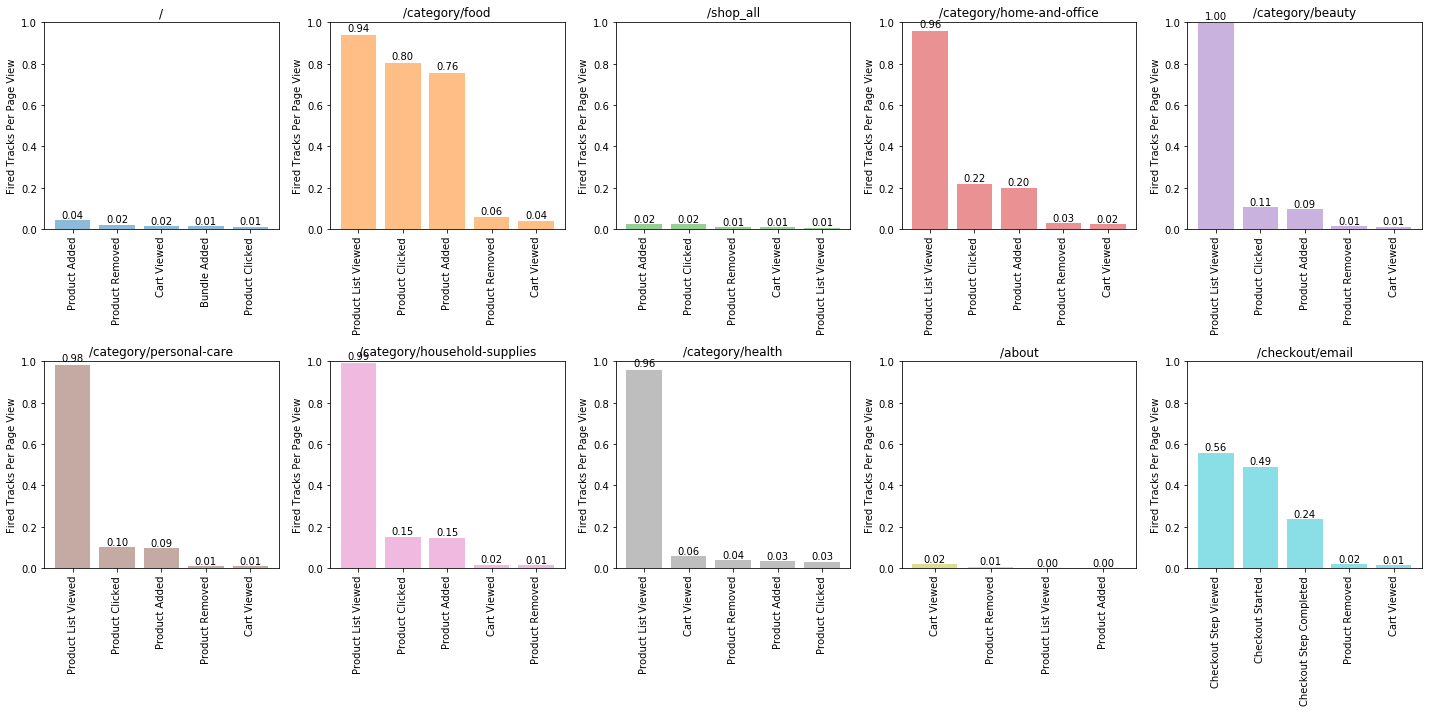

In [5]:
# plot
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

def autolabel(ax, rects, xpos='center'):
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{0:.2f}'.format(height), ha=ha[xpos], va='bottom')

paths = top_tracks_by_page.path.unique()
for i, p in enumerate(paths):
    tmp = top_tracks_by_page.loc[top_tracks_by_page.path == p, :]
    idx = np.arange(len(tmp))
    ax = axs[i//5, i%5]
    
    rects = ax.bar(idx, tmp.track_per_page, align='center', alpha=0.5, color='C{}'.format(i))
    
    autolabel(ax, rects)
    
    ax.set_ylim([0, 1])
    
    ax.set_xticks(idx)
    ax.set_xticklabels(tmp.event)
    for t in ax.get_xticklabels():
        t.set_rotation(90)
    
    ax.set_ylabel('Fired Tracks Per Page View')
    ax.set_title(p)

plt.tight_layout()
plt.show()

Takeaways: People seem to shop for food differently than other products.  For most categories, people click on a product on 10%-20% of page views.  However, for food, they click on a product on 80% of page views!  This makes intuitive sense to me; when people shop for food, they are pretty committed to making a purchase.  It wouldn't be uncommon to go shopping for clothes and not buy anything.  Also, people seem more likely to passively browse products in the health category.

### Session Orders Data

NOTE: The majority of completed orders (~80%) occured on the first click!  I wasn't sure how to handle these for the last non-direct click attribution model, since there are technically no non-direct clicks.  They show up as 'NaN' and are excluded from the graph below.

In [6]:
(sessions.visitor_session_rank[sessions.completed_orders == 1] > 1).value_counts()

False    1973
True      545
Name: visitor_session_rank, dtype: int64

In [7]:
# get last non-direct channel for each order
sessions.sort_values(by=['unique_visitor_id', 'visitor_session_rank'], ascending=True, inplace=True)
sessions['channel_group_lag1'] = sessions.groupby(['unique_visitor_id'])['channel_group'].shift(1)

# sessions.loc[sessions.channel_group_lag1.isnull(), ['channel_group_lag1']] = sessions.channel_group[sessions.channel_group_lag1.isnull()]

sessions_orders = sessions.loc[sessions.completed_orders == 1, :]

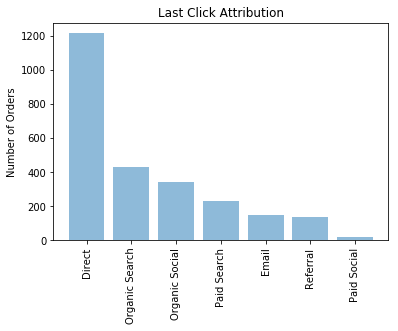

In [8]:
# plot last click attribution
attribution = sessions_orders.channel_group.value_counts()
idx = np.arange(len(attribution))
 
plt.bar(idx, attribution, align='center', alpha=0.5)
plt.xticks(idx, attribution.index, rotation=90)
plt.ylabel('Number of Orders')
plt.title('Last Click Attribution')
 
plt.show()

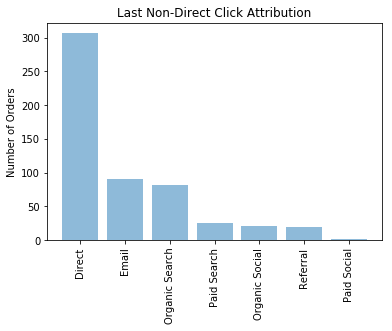

In [9]:
# plot last non-direct click attribution
attribution = sessions_orders.channel_group_lag1.value_counts()
idx = np.arange(len(attribution))
 
plt.bar(idx, attribution, align='center', alpha=0.5)
plt.xticks(idx, attribution.index, rotation=90)
plt.ylabel('Number of Orders')
plt.title('Last Non-Direct Click Attribution')
 
plt.show()

### 3. Orders and Order Detail Data

#### 3a. Matched products

NOTE: Not all orders have order details; I used the number of orders with order details as the frequency denominator for order combinations

In [10]:
# qc
len(orders), len(order_detail.order_number.unique())

(5536, 4055)

In [11]:
# generate counts for product combinations
order_items = order_detail[['order_number', 'item_number']].drop_duplicates()
order_items.sort_values(by=['order_number', 'item_number'], ascending=True, inplace=True)

order_combos = order_items.groupby(['order_number'], as_index=False)['item_number'].apply(lambda x: pd.DataFrame(list(itertools.combinations(x, 2))))
order_combos.columns = ['item1', 'item2']
order_combos = order_combos.groupby(['item1', 'item2']).size().reset_index(name='count')

order_combos['perc'] = order_combos['count'] / len(order_items.order_number.unique())

order_combos.head(10)

,item1,item2,count,perc
0,11001.0,11002.0,135,0.033292
1,11001.0,11003.0,239,0.058940
2,11001.0,11004.0,130,0.032059
3,11001.0,11005.0,72,0.017756
4,11001.0,11006.0,83,0.020469
5,11001.0,11007.0,68,0.016769
6,11001.0,11008.0,109,0.026880
7,11001.0,11009.0,115,0.028360
8,11001.0,11010.0,116,0.028607
9,11001.0,11011.0,172,0.042417


In [12]:
# # qc
# qc1 = set(order_detail.order_number[order_detail.item_number == 11001].unique().tolist())
# qc2 = set(order_detail.order_number[order_detail.item_number == 11002].unique().tolist())
# len(qc1.intersection(qc2))

#### 3b. Product subscription service

I used [reorder rate] * [number of ordering users] to prioritize products for the subscription service.  I think it is a good proxy for the number of users who would be interested in the service.

Reorder Rate = [number of users who ordered after initial order] / [number of users who ordered the product *and* had a subsequent order]

One complication: ***Just 59/5538 orders have subsequent orders from the same user***.  I suspect this is because our dataset only covers 2 weeks: 7/25/2017 - 8/8/2017.  Many of these orders may actually be reorders!  This reduces my confidence in my reorder rates, though I still think it can give us directional advice.

In [13]:
# calculate reorders after each order
orders2 = orders.loc[orders.order_number.isin(order_detail.order_number.unique()), :].copy()
orders2.sort_values(by=['user_id', 'completed_time'], ascending=False, inplace=True)
orders2['n_after'] = orders2.groupby(['user_id']).cumcount()
order_detail2 = orders2.merge(order_detail, on='order_number', how='inner')

In [14]:
# qc order dates
orders2.completed_time.dt.date.min(), orders2.completed_time.dt.date.max()

(datetime.date(2017, 7, 25), datetime.date(2017, 8, 8))

In [15]:
# calculate reorder rate for each product
reorders = order_detail2.groupby(by=['user_id', 'item_number'], as_index=False).agg({'n_after': ['min', 'max']})
reorders.columns = [i[0] if i[1] == '' else i[1] for i in reorders.columns.ravel()]
reorders = reorders.loc[reorders['max'] > 0, :]
reorders['has_reorder'] = (reorders['min'] < reorders['max']).astype(int)
reorders = reorders.groupby(['item_number'], as_index=False).agg({'user_id': 'count', 'has_reorder': 'mean'})
reorders.rename(columns={'user_id': 'reorder_denom', 'has_reorder': 'reorder_rate'}, inplace=True)

In [16]:
# calculate stats on how many users order each product
product_details = order_detail2.groupby(['item_number', 'product_name'], as_index=False).agg({'order_number': 'count', 
                                                                                              'user_id': lambda x: len(set(x))})

product_details.rename(columns={'order_number': 'n_orders', 'user_id': 'n_user_id'}, inplace=True)

In [17]:
# prioritize products 
reorders = reorders.loc[reorders.reorder_denom >= 3, :]
reorders = reorders.merge(product_details, on=['item_number'], how='inner')
reorders['n_user_reorder'] = reorders['n_user_id'] * reorders['reorder_rate']
reorders.sort_values(by=['n_user_reorder'], ascending=False, inplace=True)
reorders.head(5)

,item_number,reorder_denom,reorder_rate,product_name,n_orders,n_user_id,n_user_reorder
50,14011,8,0.750000,Toasted Coconut Cookie Thins,464,458.0,343.5
22,11044,7,0.571429,Blueberry Flax Granola,501,497.0,284.0
51,14012,7,0.428571,Chocolate Chip Cookie Thins,647,644.0,276.0
53,14014,5,0.400000,White Cheddar Flavored Quinoa Puffs,616,614.0,245.6
38,13002,4,1.000000,Organic Fair Trade Medium Roast Coffee Pods,247,242.0,242.0
